<a href="https://colab.research.google.com/github/JulienChoukroun/Automatic-detection-of-sign-language-gestures/blob/main/Automatic_Signal_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
# **<center>Automatic Signal Detector Project</center>**
<center>CHOUKROUN Julien</center>


---

# README

To load the OpenCV code there are 2 possibilities:
- If you have downloaded the OpenCV code in your Google Drive, then execute the "drive.mount" command to import your Google Drive.
- Else, clone the repository with the "git clone" command.

1st possibility: import Google Drive to have acces to the OpenCV code and to the dataset (since task 6).

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


2nd possibility: Clone this repository.

In [ ]:
# If not clone, clone it
%cd /content
!git clone https://github.com/opencv/opencv/
%cd opencv/samples/python/

/content
Cloning into 'opencv'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 289280 (delta 0), reused 0 (delta 0), pack-reused 289279
Receiving objects: 100% (289280/289280), 477.75 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (202195/202195), done.
Checking out files: 100% (6759/6759), done.
/content/opencv/samples/python


## First Task (Face Detection Simple)

1. Create a real time video stream.
2. Load the cascade classifier.
3. Format and color transformation.
4. Detect the face in the image.
5. Draw rectangle around face.
6. Detect eyes in the sub-region of face and draw rectangles.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image

import io
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_eye.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
face_cascade = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_eye.xml")

In [ ]:
# Detect the face in the image
# Use cascades to detect faces
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# scaleFactor: how much the image size is reduced at each image scale
# minNeighbors: how many neighbors each candidate rectangle should have to retain it
# minSize: Minimum possible object size. Objects smaller than that are ignored
# flags: Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade
def detect(img, cascade):
    rects = cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
    if len(rects) == 0: # if there is no object
        return []
    rects[:,2:] += rects[:,:2]
    return rects

In [ ]:
# Draw rectangle around objects
# x1 and x2 are the starting coordinates of rectangle
# x2 and y2 are the ending coordinates of rectangle
# The last parameter of cv2.rectangle is the thickness of the rectangle border line in px
def draw_rects(img, rects, color):
    for x1, y1, x2, y2 in rects:
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

<IPython.core.display.Javascript object>

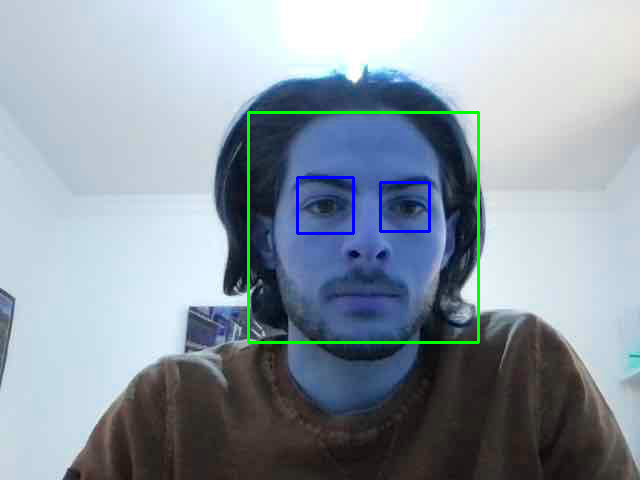

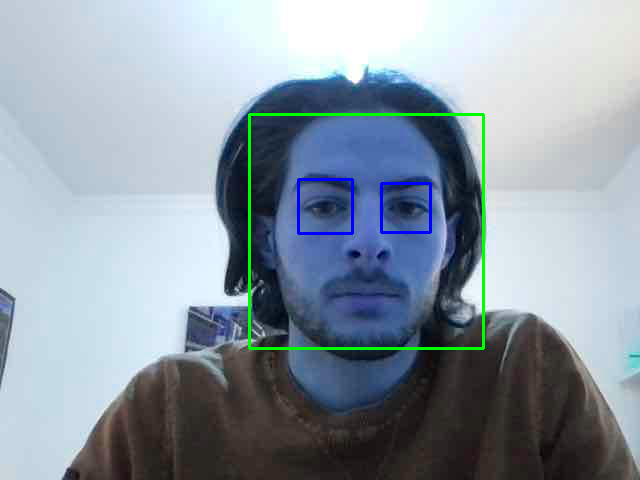

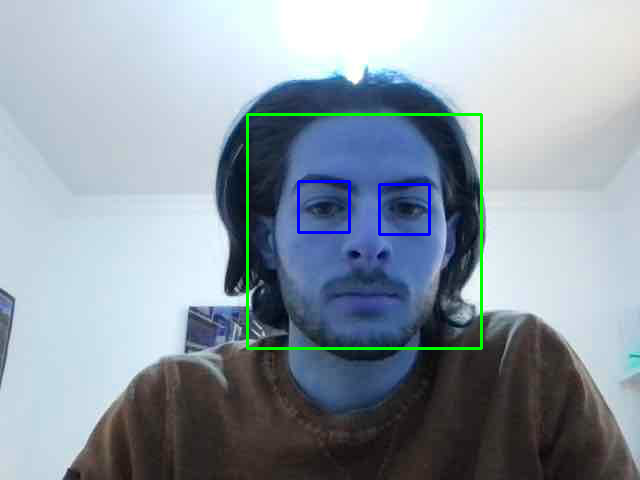

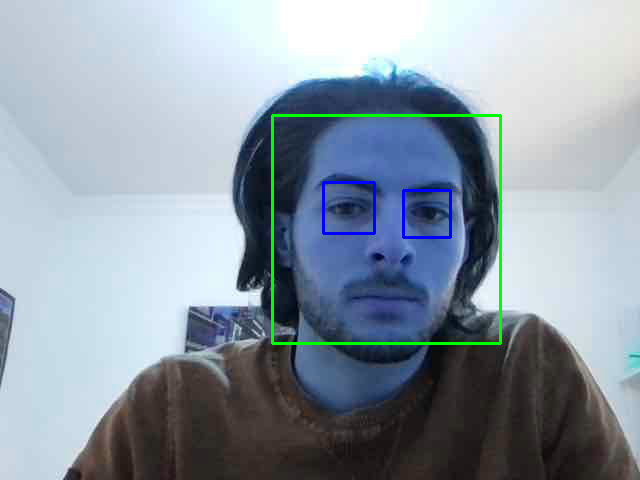

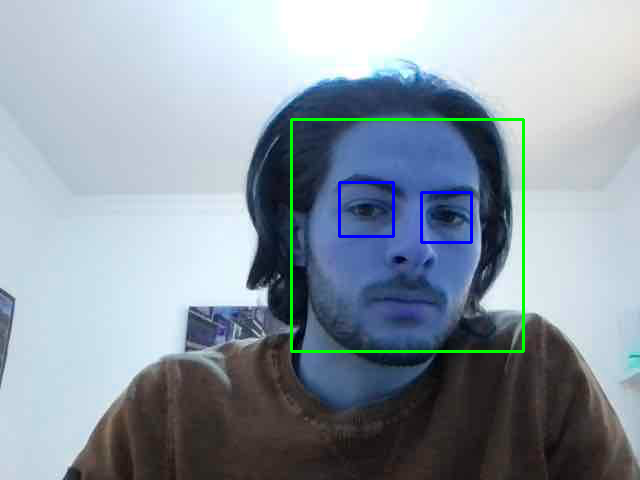

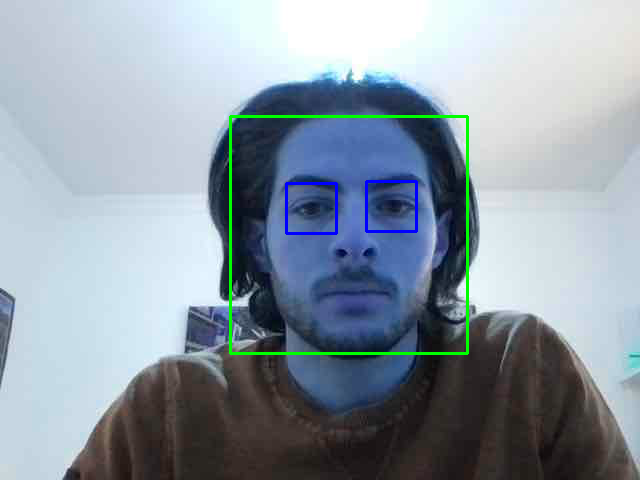

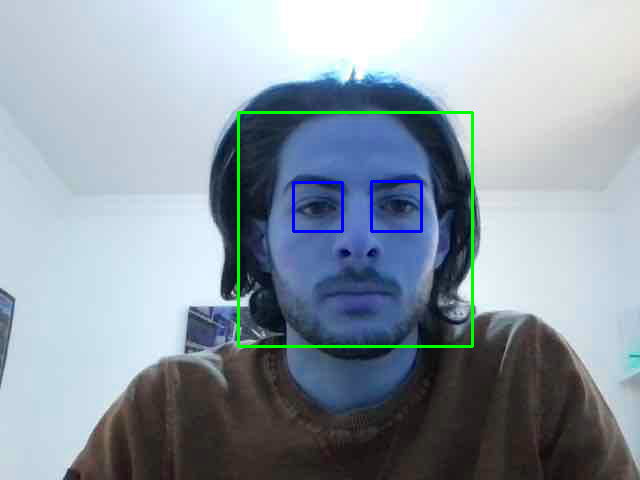

KeyboardInterrupt: ignored

In [ ]:
from google.colab.patches import cv2_imshow

VideoCapture()
eval_js('create()')

while True:
  b64_im = eval_js('capture()') # Take a capture 
  im = b64_to_bytes(b64_im) # Convert the capture from base64 to bytes array
  # Convert the image into gray scale
  gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  # Detect faces
  faces = detect(gray, face_cascade)
  vis = im.copy()
  for (x,y, w,h) in faces:
    # x and y are the coordinates of the top left corner, h is the height and w is the width
    # Draw a rectangle around the face
    draw_rects(vis, faces, (0, 255, 0))
    # Retrive the face sub region (gray and oclored)
    roi = gray[y:h, x:w]
    vis_roi = vis[y:h, x:w]
    # Detect eyes
    eyes = detect(roi, eye_cascade)
    for (e_x, e_y, e_w, e_h) in eyes:
        # Draw a rectangle around each eye
        draw_rects(vis_roi, eyes, (255, 0, 0))

    # Display the image with rectangles
    cv2_imshow(vis)

eval_js('showimg("{}")'.format(bytes_to_b64(im))) # We convert our image with bounding boxes to base64 and plot it using JS

## Second Task (Face Detection Accelerated)

The idea is instead of trying to find faces on the entire image at each time, you may want to look for faces in a region closed to the previous bounding box.

Define a ROI (Region Of Interest) according to the previous detection result.

1. Create a real-time video stream
2. Load the cascade classifier
3. Format and color transformation
4. Loop: if (don't find any face), start detecting a face in the whole image or if (find one face), next time detect in the ROI (Region Of Interest which is an expanded area of the previous detection result)
5. Draw rectangle around face

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image

import io
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
face_cascade = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
# This function computes the sub region in which we would want to detect faces
# Parameters:
# previous: The previous face bounding box (x, y, w, h) 
# img_height and img_width: height and width of the image
# margin: How much farther from the previous bounding box you would like to search for faces in the current frame 

def compute_optimized_search_region(previous, img_height, img_width, margin):
  # x and y are the coordinates of the top left corner. So to add a margin we go to the left (with minus margin)
  x_topleft = previous[0] - margin
  y_topleft = previous[1] - margin
  # To get the bottom right corner coordinates, we add the coordinates of the old top left corner with the old width (for x) or with the old height (for y). So to add a margin we go to the right (with plus margin)
  x_bottomright = previous[0] + previous[2] + margin
  y_bottomright = previous[1] + previous[3] + margin
  # Don't forget to insure boundary constraints:
  # x and y (top left corner) should be > 0 and w and h should be < image size
  x_topleft = max(x_topleft, 0) 
  y_topleft = max(y_topleft, 0)
  x_bottomright = min(x_bottomright, img_width) 
  y_bottomright = min(y_bottomright, img_height)
  # Our new coordinates
  x_new = x_topleft
  y_new = y_topleft
  w_new = x_bottomright - x_topleft
  h_new= y_bottomright - y_topleft

  return (x_new, y_new, w_new, h_new)

In [ ]:
# Video capture will enable your camera and start streaming
VideoCapture()
eval_js('create()')


# Take a capture from the video
byte = eval_js('capture()')
# Transform the capture from base64 to an array
im = b64_to_bytes(byte)
# Retrieves the width and height of the image
(img_height, img_width) = im.shape[0], im.shape[1] # To be used in the boundary constraints

# Initialize the bounding box
previous_bbox = None
margin = 50 # You can change this value as you want


while True:
  # Take a capture from the video
  byte = eval_js('capture()')
  # Transform the capture from base64 to an array
  im = b64_to_bytes(byte)
  # Use the whole image at the beginning
  region_to_use = im

  if previous_bbox is not None: 
    # If we have detected a face in the previous frame
    # Use the previous bounding box to compute the sub region in which you would like to search for faces
    (new_x, new_y, new_w, new_h) = compute_optimized_search_region(previous_bbox, img_height, img_width, margin)
    region_to_use = im[new_y:new_y+new_h, new_x:new_x+new_w]
    # Draw a red rectangle around the sub region in the 'im' image (because it's the one we will plot finally)
    cv2.rectangle(im, (new_x, new_y), (new_x + new_w, new_y + new_h), (255,0,0), 5)

  # detect faces in the sub region to use
  faces = detect_faces(region_to_use, face_cascade)
  
  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Update the face bounding box. Be careful: The coordinates should be mapped relative to the full image 'im' and not relative to the 'region_to_use'
    if previous_bbox is None: # If there is no bounding box
      (x,y,w,h) = face
    else: # If there is already a bounding box
      (x,y,w,h) = (new_x + face[0], new_y + face[1], face[2], face[3]) # Map the coordinates into origin image
    previous_bbox = (x,y,w,h)
    # Draw a green rectangle around the detected face in the original image 'im'
    cv2.rectangle(im, (x, y), (x + w, y + h), (0,255,0), 2)
  else: 
    previous_bbox = None # If we did not detect any face or more than one face we just repeat the search using the entire image in the next frame

  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # We convert our image with bounding boxes to base64 and plot it using JS 

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

## Third Task (CamShift integrated with FaceDetect)

Main process:
1. Initialize the track window with detect_faces().
2. Transform the image into HSV version.
3. Calculate the histogram of the frame contains face.
4. Back projection to obtain probabilities.
5. Use meanshift and camshift algorithms.


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image

import io
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
faces_cascades = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
faces_cascades = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
from google.colab.patches import cv2_imshow

# Create histogram
def show_hist(hist):
  bin_count = hist.shape[0]
  bin_w = 24
  img = np.zeros((256, bin_count*bin_w, 3), np.uint8)
  for i in range(bin_count):
      h = int(hist[i])
      cv2.rectangle(img, (i*bin_w+2, 255), ((i+1)*bin_w-2, 255-h), (int(180.0*i/bin_count), 255, 255), -1)
  img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
  cv2_imshow(img)

In [ ]:
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array
  im_copy = im.copy()
  faces = detect_faces(im, faces_cascades) # Detect faces

  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Draw a green rectangle around the detected face in the image
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy))) # We convert our image with bounding boxes to base64 and plot it using JS 
  response = input("Use this bounding box? [y or n]:")
  if response == 'y': # Take a screen shot
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    tracking_window = face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:ok
Use this bounding box? [y or n]:y


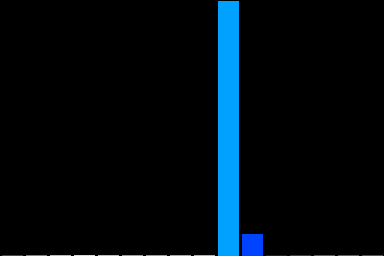

In [ ]:
# Transform the frame into HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create an inRange mask for pixels. Limit the saturation in [64., 255.] and brightness in [32., 200.]
mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
# Compute the histogram of the frame (use only the HUE channel). See `https://bit.ly/3pdVUEd`
# Take into account only pixels which are not too bright and not too dark (use the previous mask)
# Use 16 bins and specify the range of the hue ([0, 180])
frameHist = cv2.calcHist([frameHSV], [0], mask, [16], [0, 180])
# Normalize the histogram between 0 (lowest intensity) and 255 (highest intensity) (use MinMax normalization `cv.NORM_MINMAX`) using the method `https://bit.ly/3jMGhCj`
frameHist = cv2.normalize(frameHist, frameHist, 0, 255, cv2.NORM_MINMAX)
# Reashape the histogram into a 1-D array (use `.reshape(-1)`)
frameHist = frameHist.reshape(-1)
# Show the histogram
show_hist(frameHist)

**MeanShift algorithm**

In [ ]:
VideoCapture()
eval_js('create()')

# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Convert the capture in HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute an inRange mask  as before with the frame
  mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
  # Back project the frame histogram into the hsv image. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)
  # Bitwise and the back projection and the previously computed mask in order to remove very bright or very dark pixels (you can use `&` of python or cv2.bitwise_and in opencv)
  prob = prob & mask # Or use cv2.bitwise_and(prob, prob, mask)

  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  _, tracking_window = cv2.meanShift(prob, tracking_window, term_crit)
  
  # Plot a bounding box with coordiantes `tracking_window` in the image
  (x, y, w, h) = tracking_window
  cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2) # Draw a red rectangle around the face

  #eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image
  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # Show the image with the rectangle

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

**CamShift algorithm**

In [ ]:
VideoCapture()
eval_js('create()')

# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Convert the capture in HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute an inRange mask  as before with the frame
  mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
  # Back project the frame histogram into the hsv image. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)
  # Bitwise and the back projection and the previously computed mask in order to remove very bright or very dark pixels (you can use `&` of python or cv2.bitwise_and in opencv)
  prob = prob & mask # Or use cv2.bitwise_and(prob, prob, mask)

  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  bbox, tracking_window = cv2.CamShift(prob, tracking_window, term_crit)

  pts = cv2.boxPoints(bbox).astype(np.int) # Retrieve the rotated bounding rectangle
  cv2.polylines(im, [pts], True, (255, 0 , 0), 2) # Draw a red rectangle around the face
  
  #eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image
  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # Show the image with the rectangle

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

## Fourth Task (Remove the face)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image

import io
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
faces_cascades = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
faces_cascades = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
from google.colab.patches import cv2_imshow

# Create histogram
def show_hist(hist):
  bin_count = hist.shape[0]
  bin_w = 24
  img = np.zeros((256, bin_count*bin_w, 3), np.uint8)
  for i in range(bin_count):
      h = int(hist[i])
      cv2.rectangle(img, (i*bin_w+2, 255), ((i+1)*bin_w-2, 255-h), (int(180.0*i/bin_count), 255, 255), -1)
  img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
  cv2_imshow(img)

In [ ]:
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array
  im_copy = im.copy()
  faces = detect_faces(im, faces_cascades) # Detect faces

  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Draw a green rectangle around the detected face in the image
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy))) # We convert our image with bounding boxes to base64 and plot it using JS 
  response = input("Use this bounding box? [y or n]:")
  if response == 'y': # Take a screen shot
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    tracking_window_face = face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:ok
Use this bounding box? [y or n]:y


In [ ]:
# Transform the frame into HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create an inRange mask for pixels. Limit the saturation in [64., 255.] and brightness in [32., 200.]
mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
# Compute the histogram of the frame (use only the HUE channel). See `https://bit.ly/3pdVUEd`
# Take into account only pixels which are not too bright and not too dark (use the previous mask)
# Use 16 bins and specify the range of the hue ([0, 180])
frameHist = cv2.calcHist([frameHSV], [0], mask, [16], [0, 180])
# Normalize the histogram between 0 (lowest intensity) and 255 (highest intensity) (use MinMax normalization `cv.NORM_MINMAX`) using the method `https://bit.ly/3jMGhCj`
frameHist = cv2.normalize(frameHist, frameHist, 0, 255, cv2.NORM_MINMAX)
# Reashape the histogram into a 1-D array (use `.reshape(-1)`)
frameHist = frameHist.reshape(-1)
# Show the histogram
#show_hist(frameHist)

In [ ]:
VideoCapture()
eval_js('create()')

# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

# Take a capture from the video
byte = eval_js('capture()')
# Transform the capture from base64 to an array
im = b64_to_bytes(byte)
# Retrieves the width and height of the image
(im_height, im_width) = im.shape[0], im.shape[1] # To be used in the boundary constraints
tracking_window = (0, 0, im_width, im_height)

while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Convert the capture in HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute an inRange mask  as before with the frame
  mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
  # Back project the frame histogram into the hsv image. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)
  # Bitwise and the back projection and the previously computed mask in order to remove very bright or very dark pixels (you can use `&` of python or cv2.bitwise_and in opencv)
  prob = prob & mask # Or use cv2.bitwise_and(prob, prob, mask)

  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  bbox, tracking_window = cv2.CamShift(prob, tracking_window, term_crit) # Use new prob to do CamShift

  (x,y,w,h) = tracking_window # Area contains the face detection result
  prob[0:im_height, x-50:x+w+50] = 0 # Set prob of face area to 0

  pts = cv2.boxPoints(bbox).astype(np.int) # Retrieve the rotated bounding rectangle
  cv2.polylines(im, [pts], True, (255, 0 , 0), 2) # Draw rectangle around the hand
  
  eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image
  #eval_js('showimg("{}")'.format(bytes_to_b64(im)))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

## Fifth Task (Detect the hand)

This task will draw a rectangle around the face and a rectangle around the hand.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


import io
from google.colab.patches import cv2_imshow
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

In [ ]:
# This function scales a rotated rectangle by a factor of scale_x (width) and scale_y (height)
def scale_contour(pts, scale_x, scale_y):
    M = cv2.moments(pts)

    if M['m00'] == 0:
      return pts

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = pts - [cx, cy]
    cnt_scaled = cnt_norm * np.array([scale_x, scale_y])
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
faces_cascades = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
faces_cascades = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
# Detect faces using cascades
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
# Capture a frame used for histogramm backprojection
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array
  im_copy = im.copy()
  faces = detect_faces(im, faces_cascades) # Detect faces

  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Draw a green rectangle around the detected face in the image
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy))) # We convert our image with bounding boxes to base64 and plot it using JS 
  response = input("Use this bounding box? [y or n]:")
  if response == 'y': # Take a screen shot
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    tracking_window_face = face # Initial tracking window for the face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:ok
Use this bounding box? [y or n]:y


In [ ]:
# Compute the histogram

# Transform the frame into HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create an inRange mask for pixels. Limit the saturation in [64., 255.] and brightness in [32., 200.]
mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
# Compute the histogram of the frame (use only the HUE channel). See `https://bit.ly/3pdVUEd`
# Take into account only pixels which are not too bright and not too dark (use the previous mask)
# Use 16 bins and specify the range of the hue ([0, 180])
frameHist = cv2.calcHist([frameHSV], [0], mask, [16], [0, 180])
# Normalize the histogram between 0 (lowest intensity) and 255 (highest intensity) (use MinMax normalization `cv.NORM_MINMAX`) using the method `https://bit.ly/3jMGhCj`
frameHist = cv2.normalize(frameHist, frameHist, 0, 255, cv2.NORM_MINMAX)
# Reashape the histogram into a 1-D array (use `.reshape(-1)`)
frameHist = frameHist.reshape(-1)
# Show the histogram
#show_hist(frameHist)

In [ ]:
VideoCapture()
eval_js('create()')
# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

# Take a capture from the video
byte = eval_js('capture()')
# Retrieves the width and height of the image
im_width, im_height = im.shape[1],im.shape[0] # To be used in the boundary constraints
# Transform the capture from base64 to an array
im = b64_to_bytes(byte)

tracking_window_hand = (0,0,im_width,im_height) # Define the initial tracking window for the hand. It spans the entire caption


while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Transform the image into HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute the standard not too bright not too dark mask
  mask = cv2.inRange(frameHSV, np.array((0., 64., 32.)), np.array((180., 200., 200.)))

  # Back project the histogramm on the hsv img. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)

  # Apply the mask
  prob = prob & mask
  (x,y,w,h) = tracking_window_face # Area contains the face detection result
  # First look up for the face using cam shift starting from `tracking_window_face`
  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  bbox, tracking_window_face = cv2.CamShift(prob, tracking_window_face, term_crit) # Use new prob to do CamShift

  # Retrieve the rotated bounding rectangle
  pts = cv2.boxPoints(bbox).astype(np.int)

  # Find the centroid of image and better scale the bounding box
  # Scale the rotated bounding box 1.5x times  
  scaled_pts = scale_contour(pts, 1.5, 1.5)

  # Fill the rotated face bounding box with 0 in the prob map
  cv2.fillPoly(prob, [scaled_pts], 0)

  # Draw the bounding box around the face
  cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the face
  cv2.polylines(prob, [scaled_pts], True, (255, 255 , 0), 2)

  # Now look up for the hand using cam shift starting from `tracking_window_hand`

  bbox, tracking_window_hand = cv2.CamShift(prob, tracking_window_hand, term_crit)

  # Retrieve the rotated bounding rectangle
  pts = cv2.boxPoints(bbox).astype(np.int)

  # Find the centroid of image and better scale the bounding box
  # Scale the contour around the hand
  pts = scale_contour(pts, 1.8, 1.5)

  cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the hand

  ## Draw the boundix box around the hand
  eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

## Sixth Task (Create the dataset)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import io
from google.colab.patches import cv2_imshow
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

In [ ]:
# This function scales a rotated rectangle by a factor of scale_x (width) and scale_y (height)
def scale_contour(pts, scale_x, scale_y):
    M = cv2.moments(pts)

    if M['m00'] == 0:
      return pts

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = pts - [cx, cy]
    cnt_scaled = cnt_norm * np.array([scale_x, scale_y])
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

# This function crop the hand
# Here we don't retrieve directly the rotated box because it might change the letter. 
# So we compute first a new non rotated bbox, and use it to crop the hand.
def crop_hand(pts, im_width, im_height):
    x_tl, y_tl = max(0, min(pts[:, 0])), max(0, min(pts[:, 1])) # We have the different corners of the rotated bounding box
    x_br, y_br = min(im_width, max(pts[:, 0])), max(im_height, max(pts[:, 1])) # We compute those of the non rotated one arround
    return (x_tl, y_tl), (x_br, y_br)

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
faces_cascades = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
faces_cascades = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
# Detect faces using cascades
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
# Capture a frame used for histogramm backprojection
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array
  im_copy = im.copy()
  faces = detect_faces(im, faces_cascades) # Detect faces

  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Draw a green rectangle around the detected face in the image
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy))) # We convert our image with bounding boxes to base64 and plot it using JS 
  response = input("Use this bounding box? [y or n]:")
  if response == 'y': # Take a screen shot
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    tracking_window_face = face # Initial tracking window for the face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:ok
Use this bounding box? [y or n]:y


In [ ]:
# Compute the histogram

# Transform the frame into HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create an inRange mask for pixels. Limit the saturation in [64., 255.] and brightness in [32., 200.]
mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
# Compute the histogram of the frame (use only the HUE channel). See `https://bit.ly/3pdVUEd`
# Take into account only pixels which are not too bright and not too dark (use the previous mask)
# Use 16 bins and specify the range of the hue ([0, 180])
frameHist = cv2.calcHist([frameHSV], [0], mask, [16], [0, 180])
# Normalize the histogram between 0 (lowest intensity) and 255 (highest intensity) (use MinMax normalization `cv.NORM_MINMAX`) using the method `https://bit.ly/3jMGhCj`
frameHist = cv2.normalize(frameHist, frameHist, 0, 255, cv2.NORM_MINMAX)
# Reashape the histogram into a 1-D array (use `.reshape(-1)`)
frameHist = frameHist.reshape(-1)
# Show the histogram
#show_hist(frameHist)

In [ ]:
sv = tracking_window_face

In [ ]:
PATH = '/content/drive/MyDrive/Projet_Computer_Vision/Dataset/C/'

In [ ]:
tracking_window_face = sv

VideoCapture()
eval_js('create()')
# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

# Take a capture from the video
byte = eval_js('capture()')
# Retrieves the width and height of the image
im_width, im_height = im.shape[1],im.shape[0] # To be used in the boundary constraints
# Transform the capture from base64 to an array
im = b64_to_bytes(byte)

tracking_window_hand = (0,0,im_width,im_height) # Define the initial tracking window for the hand. It spans the entire caption

# Initialise a counter, so the first image will be the image 0
cpt = -1

while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Transform the image into HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute the standard not too bright not too dark mask
  mask = cv2.inRange(frameHSV, np.array((0., 64., 32.)), np.array((180., 200., 200.)))

  # Back project the histogramm on the hsv img. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)

  # Apply the mask
  prob = prob & mask
  (x,y,w,h) = tracking_window_face # Area contains the face detection result
  # First look up for the face using cam shift starting from `tracking_window_face`
  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  bbox, tracking_window_face = cv2.CamShift(prob, tracking_window_face, term_crit) # Use new prob to do CamShift

  # Retrieve the rotated bounding rectangle
  pts = cv2.boxPoints(bbox).astype(np.int)

  # Find the centroid of image and better scale the bounding box
  # Scale the rotated bounding box 1.5x times  
  scaled_pts = scale_contour(pts, 1.5, 1.5)

  # Fill the rotated face bounding box with 0 in the prob map
  cv2.fillPoly(prob, [scaled_pts], 0)

  # Draw the bounding box around the face
  #cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the face
  #cv2.polylines(prob, [scaled_pts], True, (255, 255 , 0), 2)
  #cv2.polylines(im, [scaled_pts], True, (255, 255 , 0), 2) # Draw a rectangle around the face

  # Now look up for the hand using cam shift starting from `tracking_window_hand`

  bbox, tracking_window_hand = cv2.CamShift(prob, tracking_window_hand, term_crit)

  pts = cv2.boxPoints(bbox).astype(np.int) # Retrieve the rotated bounding rectangle

  # Find the centroid of image and better scale the bounding box
  # Scale the contour around the hand
  pts = scale_contour(pts, 1.8, 1.5)

  # Hand detected
  cropped_hand_bbox = crop_hand(pts, im_width, im_height)

  #cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the hand
  #cv2.polylines(im, [pts], True, (255, 255 , 255), 2)
  cv2.rectangle(im, cropped_hand_bbox[0], cropped_hand_bbox[1], (255, 0, 0), 2) # Draw a rectangle around the cropped hand

  # Transform the color image into gray image
  cropped_hand = cv2.cvtColor(im[cropped_hand_bbox[0][1]:cropped_hand_bbox[1][1], cropped_hand_bbox[0][0]:cropped_hand_bbox[1][0]], cv2.COLOR_BGR2GRAY)
  # We create two sizes of images: 32x32 and 224x224 (16x16 is not very good)
  cropped_hand = cv2.resize(cropped_hand, (32,32))
  
  cpt += 1

  # Once we have detected the hand, we store it as an image
  cv2.imwrite(PATH + 'C_' + str(cpt) + '_32.jpg', cropped_hand)

  ## Draw the bounding box around the hand
  #eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image
  eval_js('showimg("{}")'.format(bytes_to_b64(im)))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/C_32/')

In [ ]:
# Number of elements into the directory
print(len(os.listdir(".")))

1000


In [ ]:
# To take into account letters represented with both hands (left and right), we flip each example in a mirrored way
for count, filename in enumerate(os.listdir('.')):
  if filename[-3:] == "jpg":
    plimg = Image.open(filename) # Load saved image
    # We use the transpose method to flip the image left to right and right to left.
    out = plimg.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(filename[:-4] + '_flipped' + '.jpg')

In [ ]:
# After we we store the images, we need to resize our 32x32 image to an array of size (1,1024) and save it in a txt file.
for count, filename in enumerate(os.listdir('.')):
  if filename[-3:] == "jpg":
    load_img = Image.open(filename) # Load saved image
    im = np.reshape(load_img, (1,1024))
    f = open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/dataset.txt', "a")
    f.write("C")
    for j in im[0]:
      f.write(',' + str(j))
    f.write('\n') # Each line in the dataset.txt file corresponds to one 32x32 image

In [ ]:
# After saving all images, suffle the lines in text file
import random
lines = open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/dataset.txt').readlines() # The sorted dataset
random.shuffle(lines)
open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/dataset_suffled.txt', 'w').writelines(lines) # The suffled dataset

## Seventh Task (Create the neural network)

### **Multilayer Perceptron (MLP)**

A multilayer perceptron (MLP) is a class of artificial neural network (ANN). An MLP consists of at least 3 layers of nodes: an input layer, a hidden layer and an output layer. It is a supervised learning algorithm.

All the neurons of the Multilayer Perceptron are interconnected.
A layer with all its neurons connected to neurons from other layers is called Fully Connected or Dense.
A Multilayer Perceptron is thus a network of only fully connected layers, or dense layers.
There is no (underlying) structure in Multilayer Perceptron.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The following function will take the dataset file and return two arrays: samples and letters
# The array 'samples' will contain the pixels and the array 'letters' will contains the numbers 0, 1 and 2 corresponding to the letters A, B and C
def load_dataset(dataset_file_path):
    a = np.loadtxt(dataset_file_path, delimiter=',', converters={ 0 : lambda ch : ord(ch)-ord('A') })
    samples, letters = a[:,1:], a[:,0]
    return samples, letters

In [ ]:
samples, letters = load_dataset('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/dataset_suffled.txt')

In [ ]:
# We decide how much of the dataset we will use for training and validation
train_ratio = 0.8
n_train_samples = int(len(samples) * train_ratio)
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples]
x_val, y_val = samples[n_train_samples:], letters[n_train_samples:]

In [ ]:
# We will use Keras library to build and train the MLP
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
num_classes = 3 # There are three letters A, B and C
epochs = 15

x_train = x_train.astype('float32') # Cast to the float type
x_val = x_val.astype('float32')
x_train /= 255 # Scale the data. Normalize the pixel between 0 and 1 instead of be between 0 and 255
x_val /= 255
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

2398 train samples
600 test samples


**Model layers**

The simplest model is defined in the Sequential class which is a linear stack of Layers.
We can create a Sequential model and define all of the layers in the constructor. But a more useful idiom is to create a Sequential model and add our layers in the order of the computation we wish to perform.

The first layer in our model must specify the shape of the input.
This is the number of input attributes and is defined by the input_shape argument. This argument expects an integer.

Then we define the activation function: softmax, relu, tanh, sigmoid, etc.

There are a large number of core Layer types for standard neural networks.
Some common and useful layer types you can choose from are:
- Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models. Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer.
- Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
- Merge: Combine the inputs from multiple models into a single model.

In [ ]:
# Model layers
# Create a 'Sequential' model and add a Dense layer as the first layer.
# Now the model will take as input arrays of shape (None, 1024) and output arrays of shape (None, 100).  
# Note that after the first layer, we don't need to specify the size of the input anymore.
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(1024,))) # Input layer
# Dropout with probability 20%. Useful to avoid overfitting.
model.add(Dropout(0.2))
# A simple fully connected layer with a 'relu' activation.
model.add(Dense(100, activation='relu')) # Hidden layer
# Dropout with probability 20%. Useful to avoid overfitting.
model.add(Dropout(0.2))
# A simple fully connected output layer with a 'softmax' activation.
model.add(Dense(num_classes, activation='softmax')) # Output layer

In [ ]:
# Architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 112,903
Trainable params: 112,903
Non-trainable params: 0
_________________________________________________________________


**Model compilation**

Once we have defined our model, it needs to be compiled.
This creates the efficient structures used by the underlying backend in order to efficiently execute our model during training.
We compile our model using the compile() function and it accepts three important attributes:
- Model optimizer.
- Loss function.
- Metrics.

The optimizer is the search technique used to update weights in our model.
Some popular gradient descent optimizers: 
- SGD (stochastic gradient descent with support of momentum)
- RMSprop (adaptive learning rate optimization method proposed by Geoffrey Hinton)
- Adam (Adaptive Moment Estimation that also uses adaptive learning rates)

The loss function, also called the objective function is the evaluation of the model used by the optimizer to navigate the weight space.
Some common examples include:
- mse: for mean squared error
- binary_crossentropy: for binary logarithmic loss (logloss)
- categorical_crossentropy: for multi-class logarithmic loss (logloss)

Metrics are evaluated by the model during training.
Only one metric is supported at the moment and that is accuracy.

In [ ]:
# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**Model training**

The model is trained on NumPy arrays using the fit() function.

Epochs is the number of times that the model is exposed to the training dataset.

The fit function also allows for some basic evaluation of the model during training. We can set the validation_split value to hold back a fraction of the training dataset for validation to be evaluated each epoch, or provide a validation_data tuple of (x, y) of data to evaluate.

Fitting the model returns a history object with details and metrics calculated for the model each epoch. This can be used for graphing model performance.

In [ ]:
# Model training
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/15
75/75 [==============================] - 2s 11ms/step - loss: 1.0322 - accuracy: 0.5028 - val_loss: 0.2589 - val_accuracy: 0.9583
Epoch 2/15
75/75 [==============================] - 0s 5ms/step - loss: 0.2880 - accuracy: 0.9188 - val_loss: 0.4922 - val_accuracy: 0.7100
Epoch 3/15
75/75 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9585 - val_loss: 0.0190 - val_accuracy: 0.9917
Epoch 4/15
75/75 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9646 - val_loss: 0.0069 - val_accuracy: 0.9967
Epoch 5/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 6/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0067 - val_accuracy: 0.9967
Epoch 7/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9867 - val_loss: 5.5784e-04 - val_accuracy: 1.0000
Epoch 8/15
75/7

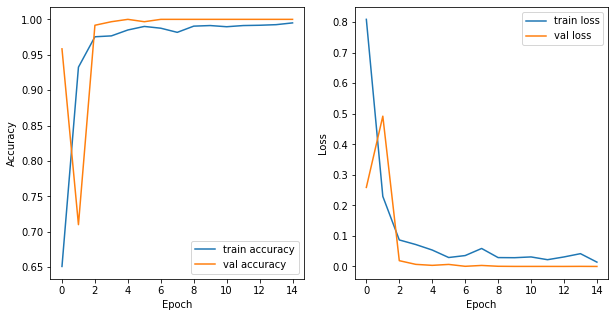

In [ ]:
# Plot the accuracy and the loss according to the epochs

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

**Model prediction**

Once we have trained our model, we can use it to make predictions on test data or new data.

We will use the model.evaluate() function to calculate the loss values for input data.

In [ ]:
# Model prediction
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.00010062316141556948
Validation accuracy: 1.0


In [ ]:
# Save the model and the weights. 
# Because every time we train our model, the initialization is random then we will have different results. 

model_json = model.to_json()
with open("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/MLP15/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/MLP15/model_weights.h5")
print("Saved model to disk")

Saved model to disk


### **Convolutional Neural Network (CNN)**

Fully connected layers are not very efficient for working with images. Convolutional neural networks, on the other hand, are much more suited for this job.

Convolutional neural networks basically take an image as input and apply different transformations that condense all the information.

Thanks to convolutional layers, our neural network is able to detect lines, forms, textures and many things.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 32, 32 # Useful for the first layer for 'input_shape'
batch_size = 32

In [ ]:
!cp /content/drive/MyDrive/Projet_Computer_Vision/Dataset.zip .

In [ ]:
!unzip Dataset.zip -d dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/Dataset/A/A_146_32.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_146_32.jpg  
  inflating: dataset/Dataset/A/A_366_32_flipped.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_366_32_flipped.jpg  
  inflating: dataset/Dataset/A/A_373_32_flipped.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_373_32_flipped.jpg  
  inflating: dataset/Dataset/A/A_3_32_flipped.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_3_32_flipped.jpg  
  inflating: dataset/Dataset/A/A_158_32.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_158_32.jpg  
  inflating: dataset/Dataset/A/A_81_32.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_81_32.jpg  
  inflating: dataset/Dataset/A/A_292_32.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_292_32.jpg  
  inflating: dataset/Dataset/A/A_125_32.jpg  
  inflating: dataset/__MACOSX/Dataset/A/._A_125_32.jpg  
  inflating: dataset/Dataset/A/A_392_32.jpg  
  inflatin

**Preparing the data for our model**

We decide how much of the dataset we will use for training and validation.

In [ ]:
# Generates a tf.data.Dataset from image files in a directory.

# seed: random seed for shuffling and transformations.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dataset/Dataset',
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dataset/Dataset',
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C']


Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. 
Doing so reduces the step time to the maximum of the training and the time it takes to extract the data.

The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed. 
In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. We set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

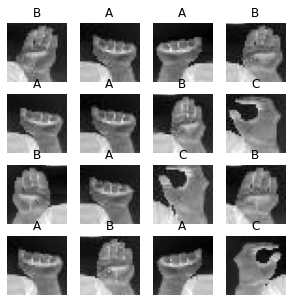

In [ ]:
# Show some images from the train dataset with the labels corresponding.
# To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")
  break

**Model layers**

The simplest model is defined in the Sequential class which is a linear stack of Layers. We can create a Sequential model and define all of the layers in the constructor.

The first layer in our model must specify the shape of the input. This is the number of input attributes and is defined by the input_shape argument. This argument expects an integer.

The convolutionnal layers convolves an image by a matrix, called Kerner or filter. The proccess is as follows:
- First, we overlay the kernel onto the image.
- Then we multiply the kernel value by the image value.
- After that, we calculate the product of the results of the previous step.
- Finally, we move the kernel one pixel and repeat the process.

Once we have the result from the previous step, we will do as we do on fully connected layers: we add the bias parameter and then apply an activation function (softmax, relu, tanh, sigmoid, etc.).

Despite there is not 'one size fits all' Kernel, neural networks with more layers and smaller kernels are more efficient that neural networks with less layers and bigger Kernels. In fact, most kernels have a dimension of 3 by 3. This is the second parameter in the Conv2D function.

With every convolutional layer the size of the result is smaller than the input of the layer. Thus, if we just apply convolutional layers with no other changes, there is a maximum amount of layers that we can apply.
Anyway, we can add a padding to the image so that the result of the image does not reduce in size.
The padding basically consists of adding some pixels on the borders of the image before applying the convolution. By doing so, we can get a result that has the same size as the input (without the padding).

The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64 or 128). Typically, as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

Pooling layers allow us to reduce the size of the image so that the neural network works faster. It basically creates a smaller image by dividing the image in several n by n matrices (2 by 2 matrices here). In Max Pooling layers, the result will be the maximum value of each smaller matrix. In Average Pooling layers, the result will be the average of the smaller matrix.
By applying a max pooling layer we ensure that the shapes detected by the convolutional layer are maintained for the next layer.

Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models. Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer.

Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.

In [ ]:
# Model layers
model = Sequential([
    # 32 convolutional filters of size 3 x 3, 'relu activation', padding = same (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1), padding='same'),
    # 2 X 2 max pooling layer (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Dropout with probability 20%. Useful to avoid overfitting. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Flatten the last image features before liking to a FFN (https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D)
    layers.GlobalAvgPool2D(),
    # A simple fully connected layer with a 'relu' activation
    layers.Dense(64, activation='relu'),
    # A simple fully connected output layer with no activation
    layers.Dense(3)
])

In [ ]:
# Architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

**Model compilation**

Once we have defined our model, it needs to be compiled.
This creates the efficient structures used by the underlying backend in order to efficiently execute our model during training.
We compile our model using the compile() function and it accepts three important attributes:
- Model optimizer.
- Loss function.
- Metrics.

The optimizer is the search technique used to update weights in our model.
Some popular gradient descent optimizers: 
- SGD (stochastic gradient descent with support of momentum)
- RMSprop (adaptive learning rate optimization method proposed by Geoffrey Hinton)
- Adam (Adaptive Moment Estimation that also uses adaptive learning rates)

The loss function, also called the objective function is the evaluation of the model used by the optimizer to navigate the weight space.
Some common examples include:
- mse: for mean squared error
- binary_crossentropy: for binary logarithmic loss (logloss)
- categorical_crossentropy: for multi-class logarithmic loss (logloss)
- tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): computes the crossentropy loss between the labels and predictions. Using from_logits=True may be more numerically stable.

Metrics are evaluated by the model during training.
Only one metric is supported at the moment and that is accuracy.

In [ ]:
# Model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model training**

The model is trained on NumPy arrays using the fit() function.

Epochs is the number of times that the model is exposed to the training dataset.

The fit function also allows for some basic evaluation of the model during training. We can set the validation_split value to hold back a fraction of the training dataset for validation to be evaluated each epoch, or provide a validation_data tuple of (x, y) of data to evaluate.

Fitting the model returns a history object with details and metrics calculated for the model each epoch. This can be used for graphing model performance.

In [ ]:
# Model training
history = model.fit(train_ds, 
                    epochs=10, 
                    validation_data=val_ds)

Epoch 1/10
75/75 [==============================] - 4s 23ms/step - loss: 4.9415 - accuracy: 0.4142 - val_loss: 0.2511 - val_accuracy: 0.9217
Epoch 2/10
75/75 [==============================] - 1s 10ms/step - loss: 0.1694 - accuracy: 0.9514 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 2.6533e-04 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 5/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 3.3301e-05 - val_accuracy: 1.0000
Epoch 6/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 4.6236e-04 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.0613e-05 - val_accuracy: 1.00

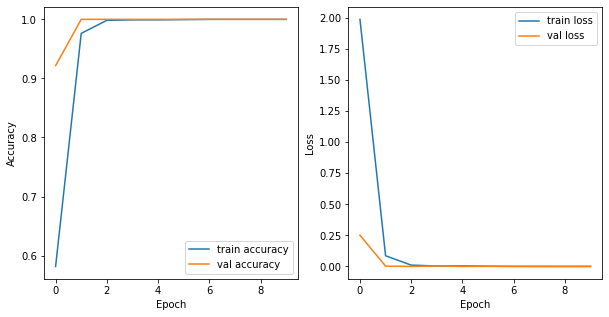

In [ ]:
# Plot the accuracy and the loss according to the epochs

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

Once we have trained our model, we can use it to make predictions on test data or new data.

We will use the model.evaluate() function to calculate the loss values for input data.

In [ ]:
# Model prediction
score = model.evaluate(val_ds, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.775233954504074e-06
Validation accuracy: 1.0


In [ ]:
# Save the model and the weights. 
# Because every time we train our model, the initialization is random then we will have different results. 

model_json = model.to_json()
with open("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/CNN10/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/CNN10/model_weights.h5")
print("Saved model to disk")

Saved model to disk


## Eighth Task (Test phase)

In [ ]:
from keras.models import model_from_json

# We load the model
# Load json and create model
json_file = open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/CNN10/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/CNN10/model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


To verify that the MLP model loaded correctly, run the next 2 blocks.

In [ ]:
# Model compilation
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Model prediction
score_loaded = loaded_model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score_loaded[0])
print('Validation accuracy:', score_loaded[1])

Validation loss: 0.00010062316141556948
Validation accuracy: 1.0


To verify that the CNN model loaded correctly, run the next 2 blocks.

In [ ]:
# Model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Model prediction
score = model.evaluate(val_ds, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.775233954504074e-06
Validation accuracy: 1.0


**Generate new images to predict the letter (from the code from the task 6)**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import io
from google.colab.patches import cv2_imshow
import cv2 # OpenCV library

In [ ]:
# Create a real time video stream
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
# Format transformation
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

In [ ]:
# This function scales a rotated rectangle by a factor of scale_x (width) and scale_y (height)
def scale_contour(pts, scale_x, scale_y):
    M = cv2.moments(pts)

    if M['m00'] == 0:
      return pts

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = pts - [cx, cy]
    cnt_scaled = cnt_norm * np.array([scale_x, scale_y])
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

# This function crop the hand
# Here we don't retrieve directly the rotated box because it might change the letter. 
# So we compute first a new non rotated bbox, and use it to crop the hand.
def crop_hand(pts, im_width, im_height):
    x_tl, y_tl = max(0, min(pts[:, 0])), max(0, min(pts[:, 1])) # We have the different corners of the rotated bounding box
    x_br, y_br = min(im_width, max(pts[:, 0])), max(im_height, max(pts[:, 1])) # We compute those of the non rotated one arround
    return (x_tl, y_tl), (x_br, y_br)

If you have loaded your Google Drive, then execute this box but not the next box.

In [ ]:
# Load the cascade classifier
# ! Be careful for the path. You have to change the path with the path of your Google Drive !
faces_cascades = cv2.CascadeClassifier("/content/drive/MyDrive/Projet_Computer_Vision/opencv-master/data/haarcascades/haarcascade_frontalface_alt.xml")

If you have cloned the repository, then execute this box.

In [ ]:
# Load the cascade classifier
faces_cascades = cv2.CascadeClassifier("/content/opencv/data/haarcascades/haarcascade_frontalface_alt.xml")

In [ ]:
# Detect faces using cascades
# Detect the face in the image
# Detects objects of different sizes in the input image
# The detected objects are returned as a list of rectangles

# In detectMultiScale, the second parameter is the scaleFactor: how much the image size is reduced at each image scale
# And the last parameter is the minNeighbors: how many neighbors each candidate rectangle should have to retain it
def detect_faces(img, cascades):
  # Convert the image into gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Use cascades to detect faces
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
# Capture a frame used for histogramm backprojection
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array
  im_copy = im.copy()
  faces = detect_faces(im, faces_cascades) # Detect faces

  if len(faces) == 1: # If the algorithm detects a face
    face = faces[0]
    # Draw a green rectangle around the detected face in the image
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy))) # We convert our image with bounding boxes to base64 and plot it using JS 
  response = input("Use this bounding box? [y or n]:")
  if response == 'y': # Take a screen shot
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    tracking_window_face = face # Initial tracking window for the face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:ok
Use this bounding box? [y or n]:y


In [ ]:
# Compute the histogram

# Transform the frame into HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create an inRange mask for pixels. Limit the saturation in [64., 255.] and brightness in [32., 200.]
mask = cv2.inRange(frameHSV, np.array((8., 64., 32.)), np.array((180., 255., 200.)))
# Compute the histogram of the frame (use only the HUE channel). See `https://bit.ly/3pdVUEd`
# Take into account only pixels which are not too bright and not too dark (use the previous mask)
# Use 16 bins and specify the range of the hue ([0, 180])
frameHist = cv2.calcHist([frameHSV], [0], mask, [16], [0, 180])
# Normalize the histogram between 0 (lowest intensity) and 255 (highest intensity) (use MinMax normalization `cv.NORM_MINMAX`) using the method `https://bit.ly/3jMGhCj`
frameHist = cv2.normalize(frameHist, frameHist, 0, 255, cv2.NORM_MINMAX)
# Reashape the histogram into a 1-D array (use `.reshape(-1)`)
frameHist = frameHist.reshape(-1)
# Show the histogram
#show_hist(frameHist)

In [ ]:
sv = tracking_window_face

In [ ]:
PATH = '/content/drive/MyDrive/Projet_Computer_Vision/Dataset/Test_C/'

In [ ]:
tracking_window_face = sv

VideoCapture()
eval_js('create()')
# These mean: Stop the mean-shift algorithm iff we effectuated 10 iterations or the computed mean does not change by more than 1pt ~ 1.3px in both directions
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

# Take a capture from the video
byte = eval_js('capture()')
# Retrieves the width and height of the image
im_width, im_height = im.shape[1],im.shape[0] # To be used in the boundary constraints
# Transform the capture from base64 to an array
im = b64_to_bytes(byte)

tracking_window_hand = (0,0,im_width,im_height) # Define the initial tracking window for the hand. It spans the entire caption

# Initialise a counter, so the first image will be the image 0
cpt = -1

while True:
  byte = eval_js('capture()') # Take a capture
  im = b64_to_bytes(byte) # Transform the capture from base64 to an array

  # Transform the image into HSV
  frameHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
  # Compute the standard not too bright not too dark mask
  mask = cv2.inRange(frameHSV, np.array((0., 64., 32.)), np.array((180., 200., 200.)))

  # Back project the histogramm on the hsv img. Use only channel 0 (Hue), range of [0,180] and scale of 1
  prob = cv2.calcBackProject([frameHSV], [0], frameHist, [0, 180], scale=1)

  # Apply the mask
  prob = prob & mask
  (x,y,w,h) = tracking_window_face # Area contains the face detection result
  # First look up for the face using cam shift starting from `tracking_window_face`
  # The first parameter is the back projection, the second parameter is the tracking window (this has been first computed in the beginning)
  bbox, tracking_window_face = cv2.CamShift(prob, tracking_window_face, term_crit) # Use new prob to do CamShift

  # Retrieve the rotated bounding rectangle
  pts = cv2.boxPoints(bbox).astype(np.int)

  # Find the centroid of image and better scale the bounding box
  # Scale the rotated bounding box 1.5x times  
  scaled_pts = scale_contour(pts, 1.5, 1.5)

  # Fill the rotated face bounding box with 0 in the prob map
  cv2.fillPoly(prob, [scaled_pts], 0)

  # Draw the bounding box around the face
  #cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the face
  #cv2.polylines(prob, [scaled_pts], True, (255, 255 , 0), 2)
  #cv2.polylines(im, [scaled_pts], True, (255, 255 , 0), 2) # Draw a rectangle around the face

  # Now look up for the hand using cam shift starting from `tracking_window_hand`

  bbox, tracking_window_hand = cv2.CamShift(prob, tracking_window_hand, term_crit)

  pts = cv2.boxPoints(bbox).astype(np.int) # Retrieve the rotated bounding rectangle

  # Find the centroid of image and better scale the bounding box
  # Scale the contour around the hand
  pts = scale_contour(pts, 1.75, 1.5)

  # Hand detected
  cropped_hand_bbox = crop_hand(pts, im_width, im_height)

  #cv2.polylines(prob, [pts], True, (255, 255 , 255), 2) # Draw a rectangle around the hand
  #cv2.polylines(im, [pts], True, (255, 255 , 255), 2)
  cv2.rectangle(im, cropped_hand_bbox[0], cropped_hand_bbox[1], (255, 0, 0), 2) # Draw a rectangle around the cropped hand

  # Transform the color image into gray image
  cropped_hand = cv2.cvtColor(im[cropped_hand_bbox[0][1]:cropped_hand_bbox[1][1], cropped_hand_bbox[0][0]:cropped_hand_bbox[1][0]], cv2.COLOR_BGR2GRAY)
  # We create two sizes of images: 32x32 and 224x224 (16x16 is not very good)
  cropped_hand = cv2.resize(cropped_hand, (32,32))
  
  cpt += 1

  # Once we have detected the hand, we store it as an image
  cv2.imwrite(PATH + 'C_' + str(cpt) + '.jpg', cropped_hand)

  ## Draw the bounding box around the hand
  #eval_js('showimg("{}")'.format(bytes_to_b64(prob))) # Show the prob image
  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # Show the image

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

**Prediction**

After saving the image, we reload it and resize it to pass to our model. Then we predict the letter.

Remember that we used the Softmax activation function when creating our model. This activation function doesn’t compute the prediction, but rather a discrete probability distribution over the target classes.
Now, we can finalize our work by actually finding out what our predicted classes are, by taking the argmax values (or “maximum argument”, index of the maximum value), with the function argmax().

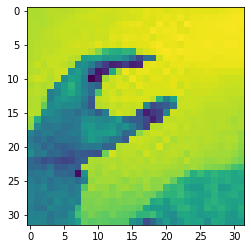

I think the letter is a C and the real one is: C


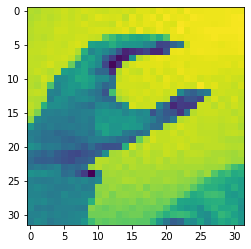

I think the letter is a C and the real one is: C


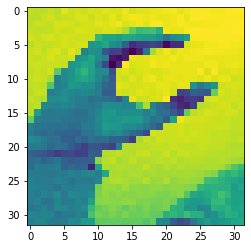

I think the letter is a C and the real one is: C


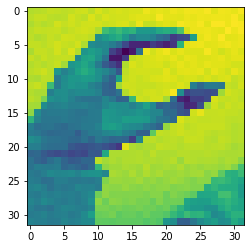

I think the letter is a C and the real one is: C


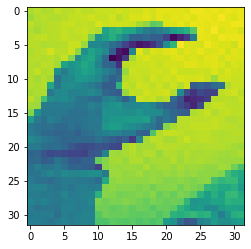

I think the letter is a C and the real one is: C


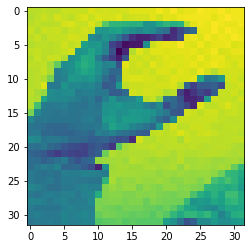

I think the letter is a C and the real one is: C


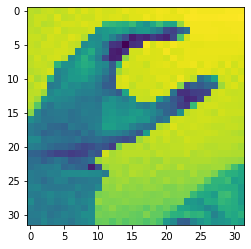

I think the letter is a C and the real one is: C


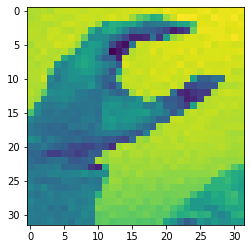

I think the letter is a C and the real one is: C


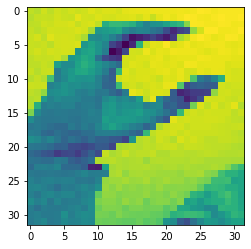

I think the letter is a C and the real one is: C


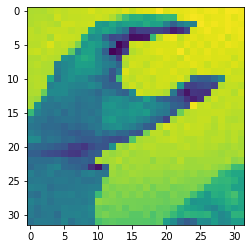

I think the letter is a C and the real one is: C


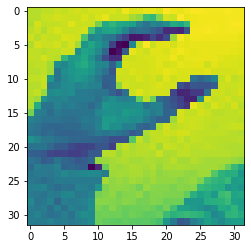

I think the letter is a C and the real one is: C


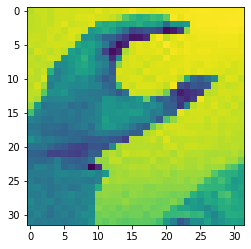

I think the letter is a C and the real one is: C


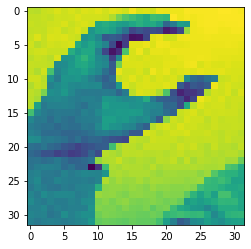

I think the letter is a C and the real one is: C


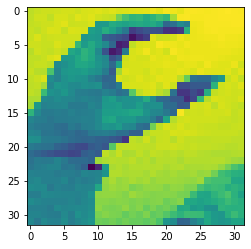

I think the letter is a C and the real one is: C


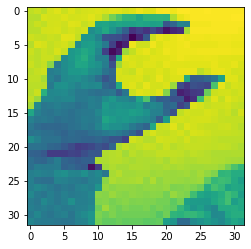

I think the letter is a C and the real one is: C


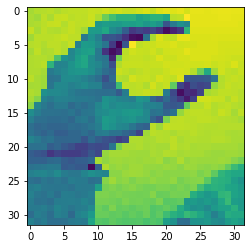

I think the letter is a C and the real one is: C


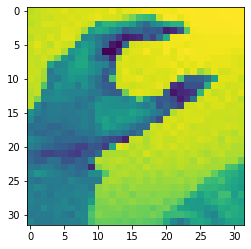

I think the letter is a C and the real one is: C


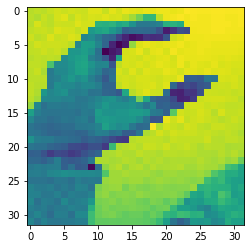

I think the letter is a C and the real one is: C


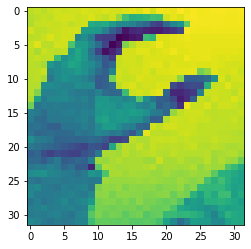

I think the letter is a C and the real one is: C


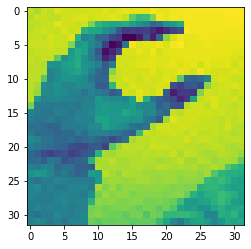

I think the letter is a C and the real one is: C


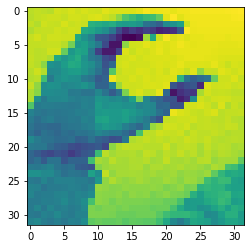

I think the letter is a C and the real one is: C


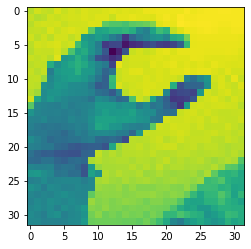

I think the letter is a C and the real one is: C


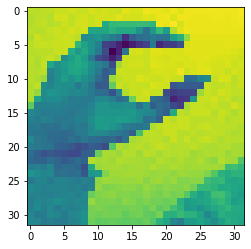

I think the letter is a C and the real one is: C


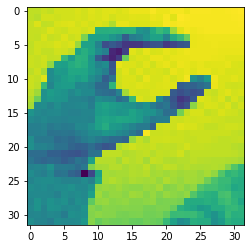

I think the letter is a C and the real one is: C


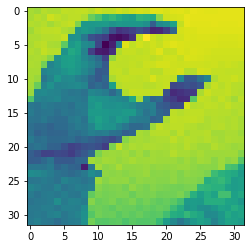

I think the letter is a C and the real one is: C


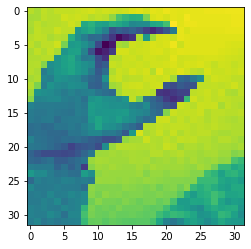

I think the letter is a C and the real one is: C


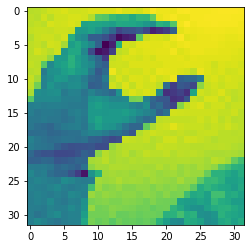

I think the letter is a C and the real one is: C


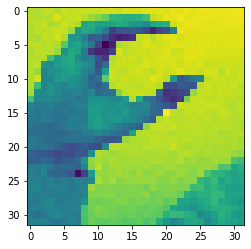

I think the letter is a C and the real one is: C


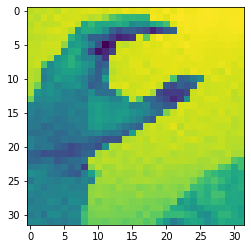

I think the letter is a C and the real one is: C


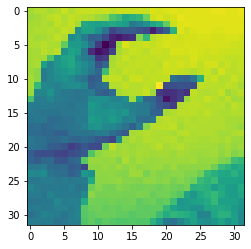

I think the letter is a C and the real one is: C


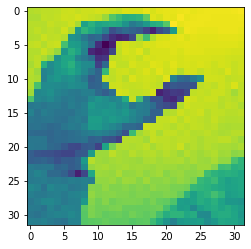

I think the letter is a C and the real one is: C


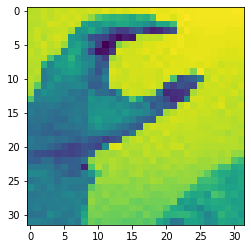

I think the letter is a C and the real one is: C


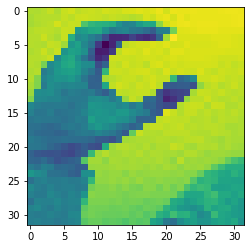

I think the letter is a C and the real one is: C


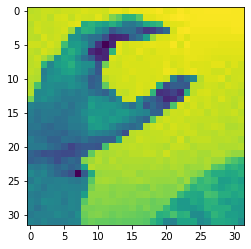

I think the letter is a C and the real one is: C


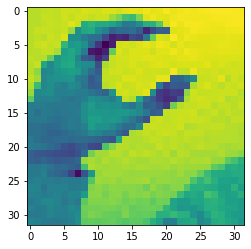

I think the letter is a C and the real one is: C


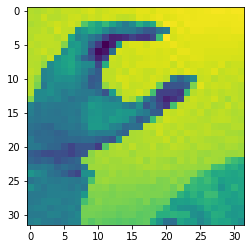

I think the letter is a C and the real one is: C


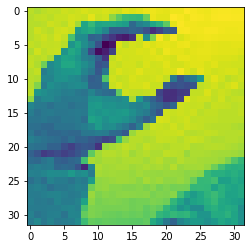

I think the letter is a C and the real one is: C


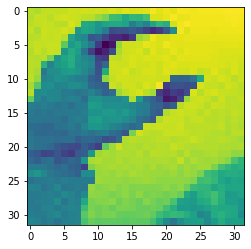

I think the letter is a C and the real one is: C


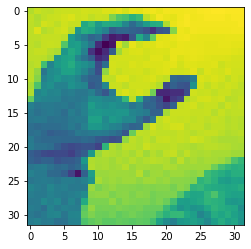

I think the letter is a C and the real one is: C


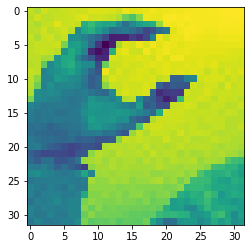

I think the letter is a C and the real one is: C


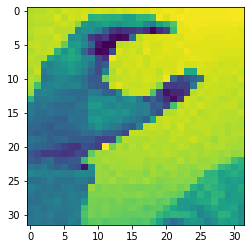

I think the letter is a C and the real one is: C


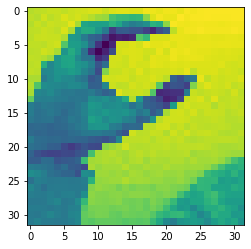

I think the letter is a C and the real one is: C


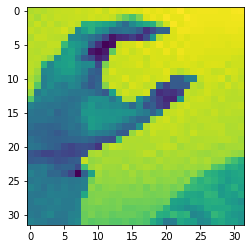

I think the letter is a C and the real one is: C


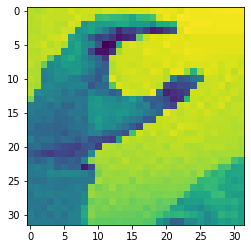

I think the letter is a C and the real one is: C


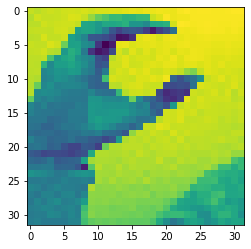

I think the letter is a C and the real one is: C


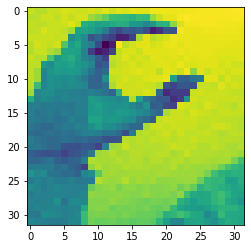

I think the letter is a C and the real one is: C


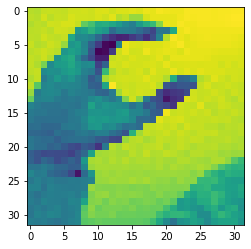

I think the letter is a C and the real one is: C


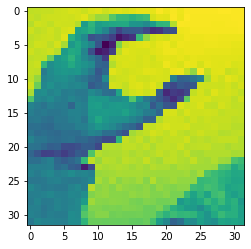

I think the letter is a C and the real one is: C


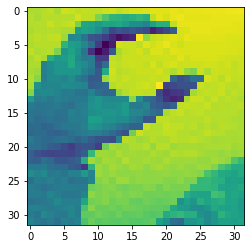

I think the letter is a C and the real one is: C


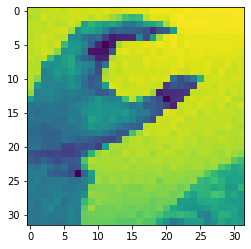

I think the letter is a C and the real one is: C


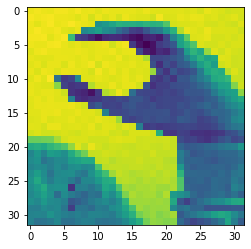

I think the letter is a C and the real one is: C


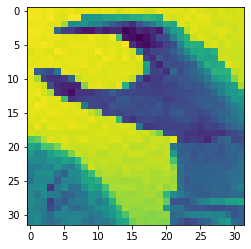

I think the letter is a C and the real one is: C


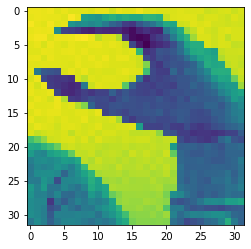

I think the letter is a C and the real one is: C


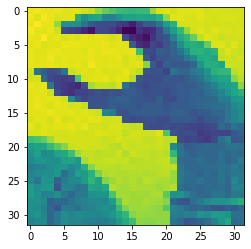

I think the letter is a C and the real one is: C


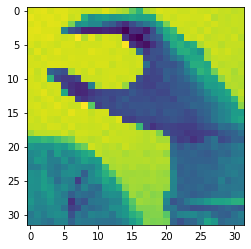

I think the letter is a C and the real one is: C


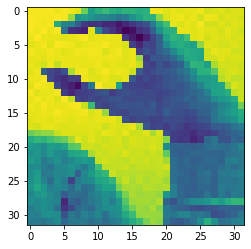

I think the letter is a C and the real one is: C


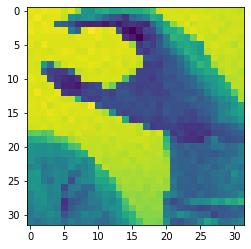

I think the letter is a C and the real one is: C


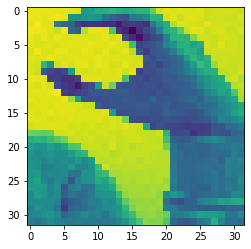

I think the letter is a C and the real one is: C


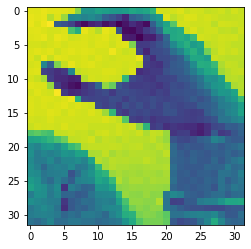

I think the letter is a C and the real one is: C


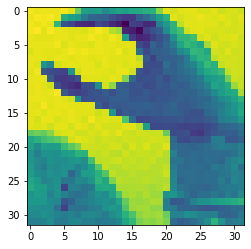

I think the letter is a C and the real one is: C


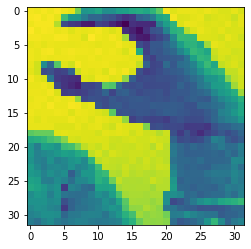

I think the letter is a C and the real one is: C


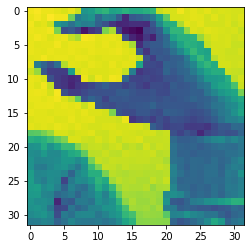

I think the letter is a C and the real one is: C


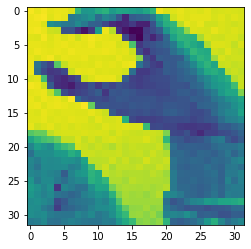

I think the letter is a C and the real one is: C


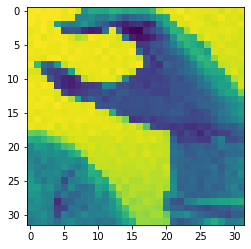

I think the letter is a C and the real one is: C


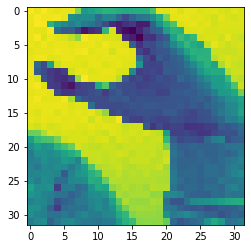

I think the letter is a C and the real one is: C


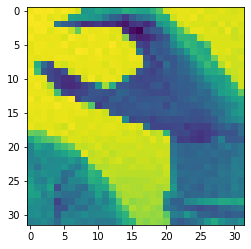

I think the letter is a C and the real one is: C


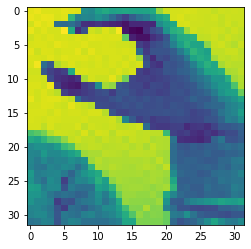

I think the letter is a C and the real one is: C


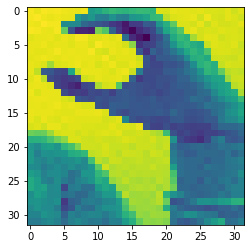

I think the letter is a C and the real one is: C


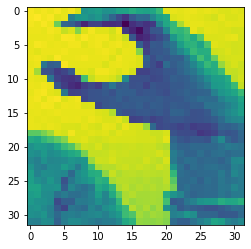

I think the letter is a C and the real one is: C


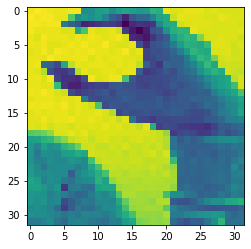

I think the letter is a C and the real one is: C


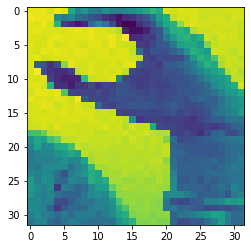

I think the letter is a C and the real one is: C


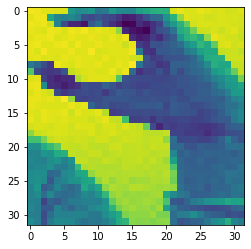

I think the letter is a C and the real one is: C


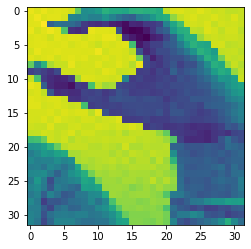

I think the letter is a C and the real one is: C


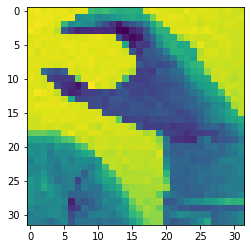

I think the letter is a C and the real one is: C


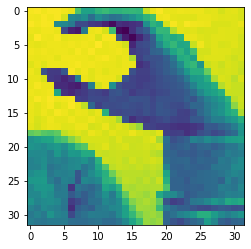

I think the letter is a C and the real one is: C


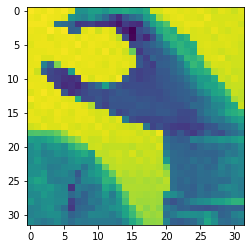

I think the letter is a C and the real one is: C


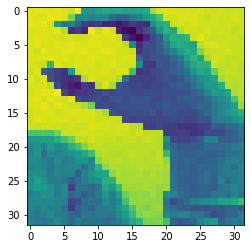

I think the letter is a C and the real one is: C


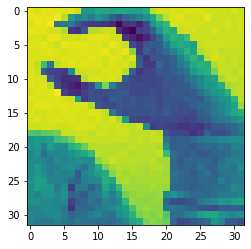

I think the letter is a C and the real one is: C


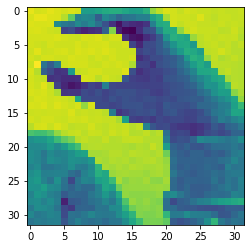

I think the letter is a C and the real one is: C


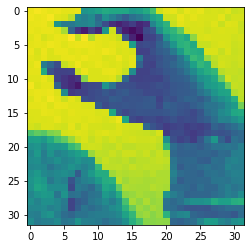

I think the letter is a C and the real one is: C


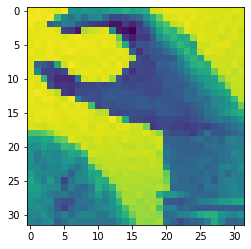

I think the letter is a C and the real one is: C


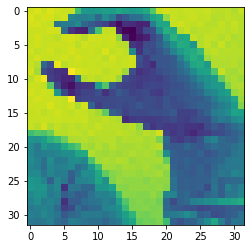

I think the letter is a C and the real one is: C


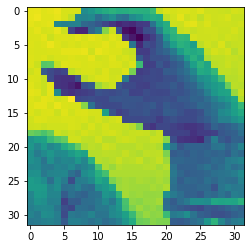

I think the letter is a C and the real one is: C


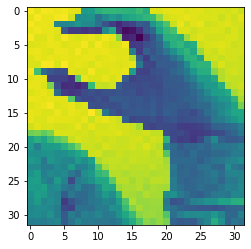

I think the letter is a C and the real one is: C


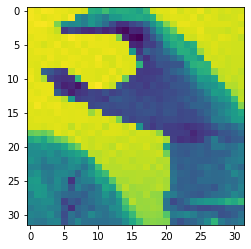

I think the letter is a C and the real one is: C


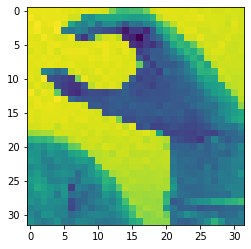

I think the letter is a C and the real one is: C


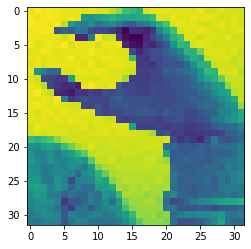

I think the letter is a C and the real one is: C


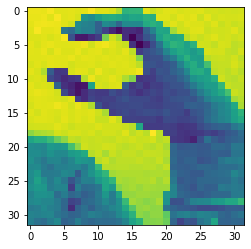

I think the letter is a C and the real one is: C


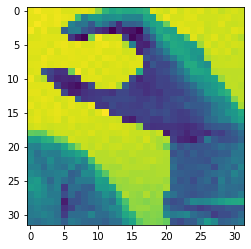

I think the letter is a C and the real one is: C


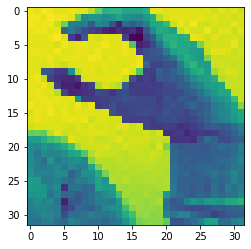

I think the letter is a C and the real one is: C


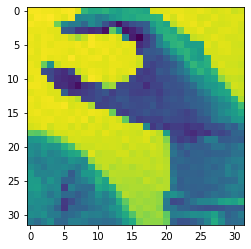

I think the letter is a C and the real one is: C


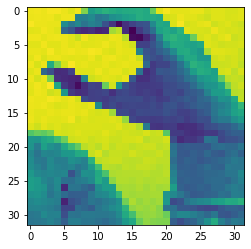

I think the letter is a C and the real one is: C


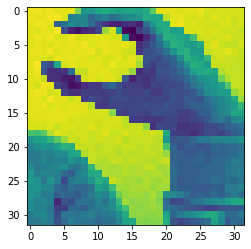

I think the letter is a C and the real one is: C


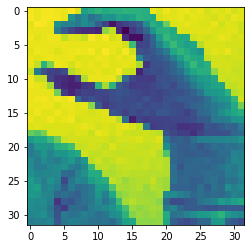

I think the letter is a C and the real one is: C


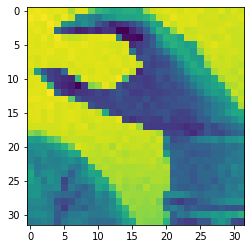

I think the letter is a C and the real one is: C


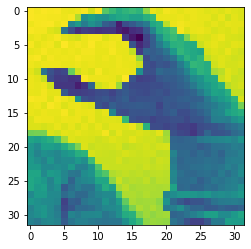

I think the letter is a C and the real one is: C


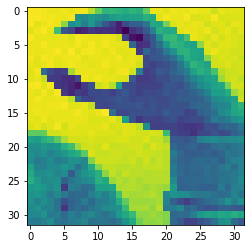

I think the letter is a C and the real one is: C


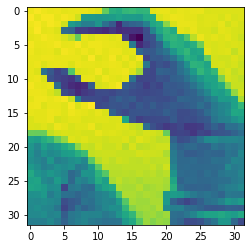

I think the letter is a C and the real one is: C


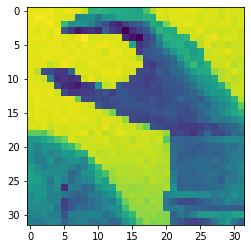

I think the letter is a C and the real one is: C


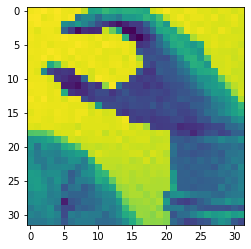

I think the letter is a C and the real one is: C
 
The execution time for 100 images is: 49.05357122421265
The number of errors is: 0
The accuracy is: 1.0


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import time

mypath="/content/drive/MyDrive/Projet_Computer_Vision/Dataset/Test_C"

# Create an array with all the images in '.jpg'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

t1 = time.time()
cpt = 0
for x in onlyfiles:
  imPath=mypath + '/' + x # The path to an image
  hand_image=Image.open(imPath) # Load saved image

  ####hand_image=np.reshape(hand_image,(1,1024)) # For MLP
  hand_image=np.reshape(hand_image,(-1,32,32,1)) # For CNN

  prediction = loaded_model.predict(hand_image) # Where hand_image is the probability image of your hand of size (1,1024)
  prediction = prediction.argmax() # prediction variable will be 0, 1 or 2 for A, B or C respectively
  predicted_letter = chr(ord('A') + prediction)

  # We show the images
  img=plt.imread(imPath)
  imgplot=plt.imshow(img)
  plt.show()
  
  print("I think the letter is a " + predicted_letter + " and the real one is: " + x[0])

  if (predicted_letter == x[0]):
    cpt += 1

print(" ")
t2 = time.time()
t_final = t2-t1
print("The execution time for", len(onlyfiles),"images is:", t_final)

print("The number of errors is:", len(onlyfiles)-cpt)
print("The accuracy is:", cpt/len(onlyfiles))


**Conclusion**

We observe that the CNN is more efficient than the MLP, but the CNN is slightly slower than the MLP. Indeed, the scores are:
- For the MLP : 
  * For the letter A, the execution time for 100 images is **37.05** seconds and the accuracy is **0.49**.
  * For the letter B, the execution time for 100 images is **35.66** seconds and the accuracy is **1.0**.
  * For the letter C, the execution time for 100 images is **34.51** seconds and the accuracy is **0.8**.

- For the CNN : 
  * For the letter A, the execution time for 100 images is **34.76** seconds and the accuracy is **1.0**.
  * For the letter B, the execution time for 100 images is **40.00** seconds and the accuracy is **1.0**.
  * For the letter C, the execution time for 100 images is **45.68** seconds and the accuracy is **1.0**.

## Ninth Task (Transfer Learning)

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

Transfer learning is an optimization that allows rapid progress or improved performance when modeling the second task.

Here, we will use the pre-trained model VGG which is a convolutional neural network model. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

In [ ]:
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import glob
import numpy as np

Instead of using directly the frames of the image, we will extract the image features from the pre-trained network VGG.

In [ ]:
path_to_images = "/content/drive/MyDrive/Projet_Computer_Vision/Dataset/C_224"
paths_list = sorted(glob.glob(path_to_images + "/*"))
X = np.empty((len(paths_list), 224, 224, 3))
for i, image_path in enumerate(paths_list):
    img = image.load_img(image_path) # Load the image
    img = image.img_to_array(img) # Transform the image into an array
    img = preprocess_input(img) # Will convert the images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.
    X[i] = img

In [ ]:
vgg_model = VGG19(weights='imagenet') # Load VGG model and weights

In [ ]:
model = Model(inputs=vgg_model.input, outputs=[vgg_model.get_layer("fc2").output]) # Get the fc2 layer instead of the prediction layer trained for ImageNet
model.summary() # See our model

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
output_feats = model.predict(X) # Extract features of our images. Size = (nb_images, 4096)

We create a text file similar to the previous one used for the MLP: First element of the line is the letter and the rest are the 4096 features extracted from VGG. 

In [ ]:
with open("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/dataset_vgg.txt", "a") as file:
  for line in output_feats:
    file.write("C, " + ", ".join(map(str, line)) + "\n") # Each line in the dataset_vgg.txt file corresponds to one 224x224 image

In [ ]:
# After saving all images, shuffle the lines in text file
import random
lines = open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/dataset_vgg.txt').readlines() # The sorted dataset
random.shuffle(lines)
open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/dataset_vgg_shuffled.txt', 'w').writelines(lines) # The shuffled dataset

Now we train our MLP with the features extracted from VGG instead of training your MLP with the pixel values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The following function will take the dataset file and return two arrays: samples and letters
# The array 'samples' will contain the pixels and the array 'letters' will contains the numbers 0, 1 and 2 corresponding to the letters A, B and C
def load_dataset(dataset_file_path):
    a = np.loadtxt(dataset_file_path, delimiter=',', converters={ 0 : lambda ch : ord(ch)-ord('A') })
    samples, letters = a[:,1:], a[:,0]
    return samples, letters

In [ ]:
samples, letters = load_dataset('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/dataset_vgg_shuffled.txt')

In [ ]:
# We decide how much of the dataset we will use for training, validation and test
train_ratio = 0.6
val_ratio = 0.2

n_train_samples = int(len(samples) * train_ratio)
n_val_samples = int(len(samples) * val_ratio) + n_train_samples

x_train, y_train = samples[:n_train_samples], letters[:n_train_samples]
x_val, y_val = samples[n_train_samples:n_val_samples], letters[n_train_samples:n_val_samples]
x_test, y_test = samples[n_val_samples:], letters[n_val_samples:]

In [ ]:
# We will use Keras library to build and train the MLP
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
num_classes = 3 # There are three letters A, B and C
epochs = 5

x_train = x_train.astype('float32') # Cast to the float type
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Scale the data. Normalize the pixel between 0 and 1 instead of be between 0 and 255
x_val /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1800 train samples
600 validation samples
600 test samples


In [ ]:
# Model layers
# Create a 'Sequential' model and add a Dense layer as the first layer.
# Now the model will take as input arrays of shape (None, 1024) and output arrays of shape (None, 100).  
# Note that after the first layer, we don't need to specify the size of the input anymore.
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(4096,))) # Input layer
# Dropout with probability 20%. Useful to avoid overfitting.
model.add(Dropout(0.2))
# A simple fully connected layer with a 'relu' activation.
model.add(Dense(100, activation='relu')) # Hidden layer
# Dropout with probability 20%. Useful to avoid overfitting.
model.add(Dropout(0.2))
# A simple fully connected output layer with a 'softmax' activation.
model.add(Dense(num_classes, activation='softmax')) # Output layer

In [ ]:
# Architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 420,103
Trainable params: 420,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Model training
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/5
57/57 [==============================] - 4s 11ms/step - loss: 0.7483 - accuracy: 0.7843 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 2/5
57/57 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/5
57/57 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 7.7477e-05 - val_accuracy: 1.0000
Epoch 4/5
57/57 [==============================] - 0s 4ms/step - loss: 2.3289e-04 - accuracy: 1.0000 - val_loss: 7.0429e-06 - val_accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 0s 4ms/step - loss: 4.9957e-05 - accuracy: 1.0000 - val_loss: 1.1393e-06 - val_accuracy: 1.0000


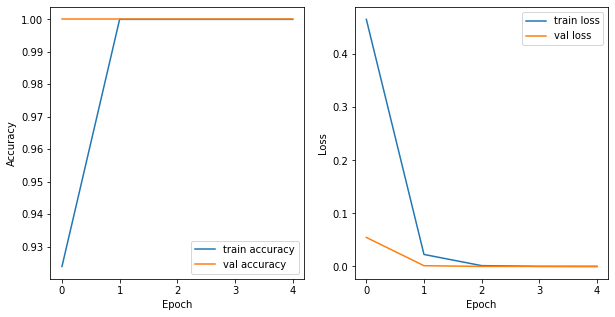

In [ ]:
# Plot the accuracy and the loss according to the epochs

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
# Model prediction
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.139315941145469e-06
Validation accuracy: 1.0


In [ ]:
# Save the model and the weights. 
# Because every time we train our model, the initialization is random then we will have different results. 

model_json = model.to_json()
with open("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/MLP5/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/MLP5/model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json

# We load the model
# Load json and create model
json_file = open('/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/MLP5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Projet_Computer_Vision/Dataset/VGG/MLP5/model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# Prediction

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import time

prediction = loaded_model.predict(x_test) # We predict in the test set

sizePred = len(prediction)
t1 = time.time()
cpt = 0 # To count the number of good prediction
for i in range(sizePred):
  pred_x = prediction[i].argmax() # prediction variable will be 0, 1 or 2 for A, B or C respectively
  predicted_letter_x = chr(ord('A') + pred_x)
  pred_y = y_test[i].argmax() # prediction variable will be 0, 1 or 2 for A, B or C respectively
  predicted_letter_y = chr(ord('A') + pred_y)
  print("I think the letter is a " + predicted_letter_x + " and the real one is: " + predicted_letter_y)
  if (predicted_letter_x == predicted_letter_y):
    cpt += 1

print(" ")
t2 = time.time()
t_final = t2-t1 # To have the execution time
print("The execution time for", sizePred,"images is:", t_final)

print("The number of errors is:", sizePred-cpt)
print("The accuracy is:", cpt/sizePred)

I think the letter is a B and the real one is: B
I think the letter is a A and the real one is: A
I think the letter is a A and the real one is: A
I think the letter is a A and the real one is: A
I think the letter is a C and the real one is: C
I think the letter is a A and the real one is: A
I think the letter is a B and the real one is: B
I think the letter is a A and the real one is: A
I think the letter is a B and the real one is: B
I think the letter is a B and the real one is: B
I think the letter is a C and the real one is: C
I think the letter is a B and the real one is: B
I think the letter is a A and the real one is: A
I think the letter is a B and the real one is: B
I think the letter is a B and the real one is: B
I think the letter is a C and the real one is: C
I think the letter is a B and the real one is: B
I think the letter is a B and the real one is: B
I think the letter is a B and the real one is: B
I think the letter is a A and the real one is: A
I think the letter i

**Conclusion**

We observe that the MLP from the VGG is more efficient than the MLP and equivalent to the CNN (for the accuracy). And this algorithm is more faster than the two other algorithms. Indeed, the scores are:

The execution time for 600 images is **0.21** seconds and the accuracy is **1.0**.

Finally, transfer learning speeded up training and improved the performance of our deep learning model.